In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import cufflinks as cf
import plotly.express as px
import chart_studio.plotly as py

from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)
cf.go_offline()

In [2]:
# basics understanding
arr1 = np.random.rand(50, 4)
df_1 = pd.DataFrame(arr1, columns=['a', 'b', 'c', 'd'])
df_1.head()

,a,b,c,d
0,0.585874,0.070389,0.741067,0.455302
1,0.745382,0.527717,0.242031,0.886869
2,0.056036,0.335157,0.187846,0.769826
3,0.552360,0.694633,0.340176,0.175846
4,0.418606,0.790600,0.048418,0.160471


<AxesSubplot:>

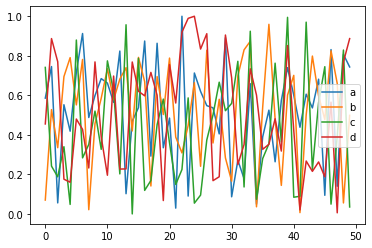

In [3]:
df_1.plot() #old ways

In [4]:
df_1.iplot()

# line plots

In [5]:
# line plots
import plotly.graph_objects as go # making more customized graphs
df_stocks = px.data.stocks()
px.line(df_stocks, x='date', y='GOOG', labels={'x': 'Date', 'y': 'Price'})

px.line(df_stocks, x='date', y=['GOOG', 'AAPL'], 
    labels={'x': 'Date', 'y': 'Price'}, title='Apple vs Google')

In [6]:
# plotting styling plots
fig = go.Figure()
fig.add_trace(go.Scatter(x=df_stocks.date, y=df_stocks.AAPL, mode='lines', name='Apple'))
fig.add_trace(go.Scatter(x=df_stocks.date, y=df_stocks.AMZN, mode='lines+markers', name='Amazon'))
fig.add_trace(go.Scatter(x=df_stocks.date, y=df_stocks.GOOG, mode='lines+markers', name='Google', 
    line=dict(color='firebrick', width=2, dash='dot')))
fig.update_layout(title='Stock price data 2018-2019', xaxis_title='Price', yaxis_title='Date')

# Bar chart

In [7]:
df_us = px.data.gapminder().query("country == 'United States'")
px.bar(df_us, x='year', y='pop')

#stacked bar
df_tips = px.data.tips()
px.bar(df_tips, x='day', y='tip', color='sex', 
    title='Tips by Sex on each day', labels={'tip': 'Tip Amount', 'day': 'Day of the week'})

# place bars next to each other
px.bar(df_tips, x='sex', y='total_bill', color='smoker', barmode='group')

# population data for countries in europe >2 million
df_europe = px.data.gapminder().query("continent == 'Europe' and year == 2007 and pop > 2.e6")
fig = px.bar(df_europe, y='pop', x='country', text='pop', color='country')
# add population above the bar
fig.update_traces(texttemplate='%{text:.2s}', textposition='outside')
fig.update_layout(uniformtext_minsize=8)
# rotate the x label to 45 degrees
fig.update_layout(xaxis_tickangle=-45)
fig

# Scatter plots